# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
print(tf.__version__)

2.2.0


## As a rule of thumb

Remember that the pooling operation decreases the size of the image, and we lose information.

However, the number of features generally increases and we get more features extracted from the images.

The choices of hyperparams bother us sometimes, because DL has a lot of trial and error involved, we can choose the 

- learning rate

- number of layers

- number of neurons per layer 

- feature size 

- feature number 

- pooling size 

- stride 

On a side note, if you use strided convolution layers, they will decrease the size of the image as well


If we have images with different sizes as inputs; for example; H1 x W1 x 3 and H2 x W2 x 3, then the output will be flatten-ed to different sizes, this won't work for DENSE layers as they do not have change-able input sizes, so we use global max pooling to make a vector of size 1 x 1 x (#_Of_Feature_Maps_)

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_train, X_test = X_train / 255.0 , X_test / 255.0 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)
print(X_test.shape)
# SHAPE 
# N x H x W x Colors 
# Colors = 1 for grayscale 
# Fashion MNIST is grayscale

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
classes = len(set(y_train))
print(classes)

10


In [0]:
input_shape = X_train[0].shape

In [0]:
i_layer = Input(shape = input_shape)
h_layer = Conv2D(16, (3,3), strides = 2, activation='relu')(i_layer)
h_layer = Conv2D(32, (3,3), strides = 2, activation='relu')(h_layer)
h_layer = Conv2D(64, (3,3), strides = 2, activation='relu')(h_layer)
h_layer = Flatten()(h_layer)
h_layer = Dropout(0.4)(h_layer)
h_layer = Dense(512, activation='relu')(h_layer)
h_layer = Dropout(0.4)(h_layer)
o_layer = Dense(classes, activation='softmax')(h_layer)

model = Model(i_layer, o_layer)


In [0]:
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6185 - accuracy: 0.7731 - val_loss: 0.4478 - val_accuracy: 0.8321
Epoch 2/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4480 - accuracy: 0.8341 - val_loss: 0.3971 - val_accuracy: 0.8527
Epoch 3/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4022 - accuracy: 0.8505 - val_loss: 0.3773 - val_accuracy: 0.8580
Epoch 4/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3720 - accuracy: 0.8612 - val_loss: 0.3534 - val_accuracy: 0.8676
Epoch 5/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3505 - accuracy: 0.8682 - val_loss: 0.3405 - val_accuracy: 0.8736
Epoch 6/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3354 - accuracy: 0.8746 - val_loss: 0.3315 - val_accuracy: 0.8784
Epoch 7/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3225 - accuracy: 0.8791 - val_loss: 0.3203 - val_ac

In [0]:
y_pred = model.predict(X_test).argmax(axis=1) 
# only for sparse categorical crossentropy

In [0]:
# Taken from https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_test.csv
labels = "T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,AnkleBoot".split(",")

In [0]:
def evaluation_tf(report, y_test, y_pred, classes):
  plt.plot(report.history['loss'], label = 'training_loss')
  plt.plot(report.history['val_loss'], label = 'validation_loss')
  plt.legend()

  plt.plot(report.history['accuracy'], label = 'training_accuracy')
  plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
  plt.legend()

  from sklearn.metrics import confusion_matrix
  import itertools
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(10,10))
  plt.imshow(cm, cmap=plt.cm.Blues)
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], 'd'),
            horizontalalignment = 'center',
            color='black')
  plt.xlabel("Predicted labels")
  plt.ylabel("True labels")
  plt.xticks(range(0,classes))
  plt.yticks(range(0,classes))
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.show()

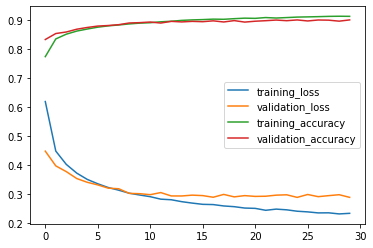

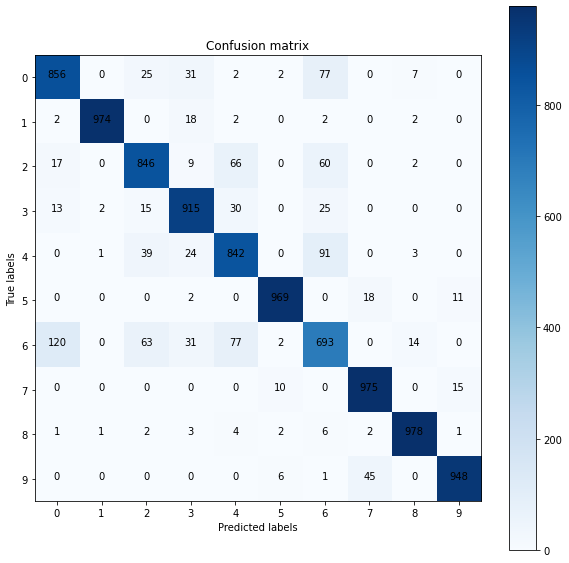

In [0]:
evaluation_tf(report, y_test, y_pred, classes)

Text(0.5, 1.0, 'Predicted = Coat, Real = Shirt')

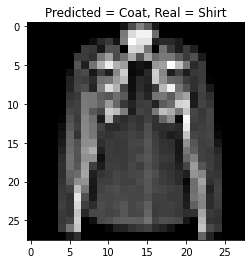

In [0]:
misshits = np.where(y_pred!=y_test)[0]
index = np.random.choice(misshits)
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title("Predicted = " + str(labels[y_pred[index]]) + ", Real = " + str(labels[y_test[index]]))